In [7]:
# python library
import os, time, datetime, random, math

# warnings
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
plt.style.use('ggplot')

# missingno
import missingno


In [3]:
# load datset
train_data = pd.read_csv('datasets/train.csv')
test_data = pd.read_csv('datasets/test.csv')
sample_sub = pd.read_csv('datasets/sample_submission.csv')

In [4]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [6]:
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


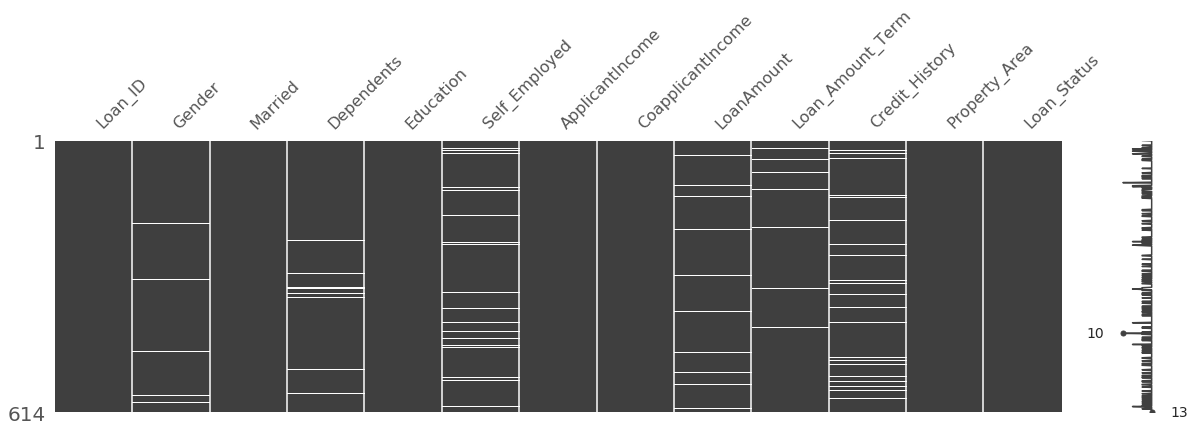

In [8]:
missingno.matrix(train_data, figsize=(20,5))

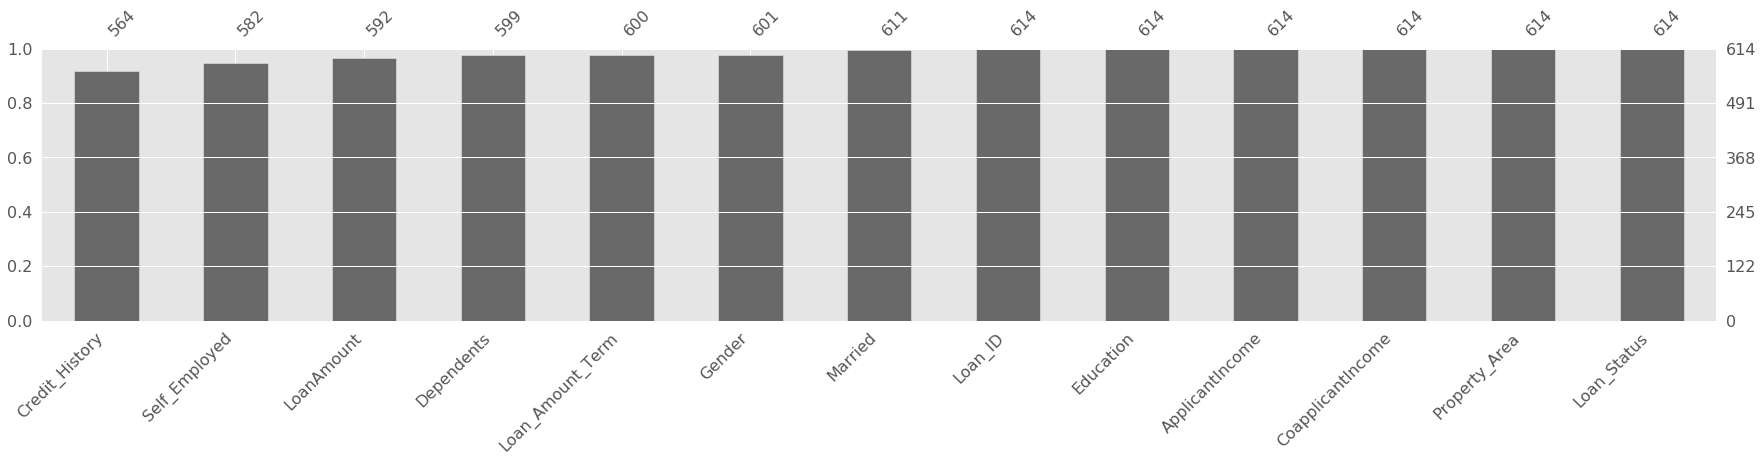

In [11]:
missingno.bar(train_data, sort = 'ascending', figsize = (30,5));

In [12]:
train_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [13]:
train_data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [16]:
train_data.drop('Loan_ID', inplace = True, axis = 1)

In [17]:
train_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [19]:
data_bin = pd.DataFrame() # discrete variable
data_con = pd.DataFrame() # continuous variable

In [20]:
train_data.shape

(614, 12)

In [21]:
# join train and test data
data_raw = train_data.append(test_data)
data_raw.reset_index(inplace = True)
data_raw.drop('index', inplace = True, axis = 1)

In [22]:
data_raw.head()

,ApplicantIncome,CoapplicantIncome,Credit_History,Dependents,Education,Gender,LoanAmount,Loan_Amount_Term,Loan_ID,Loan_Status,Married,Property_Area,Self_Employed
0,5849,0.0,1.0,0,Graduate,Male,NaN,360.0,NaN,Y,No,Urban,No
1,4583,1508.0,1.0,1,Graduate,Male,128.0,360.0,NaN,N,Yes,Rural,No
2,3000,0.0,1.0,0,Graduate,Male,66.0,360.0,NaN,Y,Yes,Urban,Yes
3,2583,2358.0,1.0,0,Not Graduate,Male,120.0,360.0,NaN,Y,Yes,Urban,No
4,6000,0.0,1.0,0,Graduate,Male,141.0,360.0,NaN,Y,No,Urban,No


In [23]:
data_raw.drop('Loan_ID', inplace = True, axis = 1)

In [24]:
data_raw.head()

,ApplicantIncome,CoapplicantIncome,Credit_History,Dependents,Education,Gender,LoanAmount,Loan_Amount_Term,Loan_Status,Married,Property_Area,Self_Employed
0,5849,0.0,1.0,0,Graduate,Male,NaN,360.0,Y,No,Urban,No
1,4583,1508.0,1.0,1,Graduate,Male,128.0,360.0,N,Yes,Rural,No
2,3000,0.0,1.0,0,Graduate,Male,66.0,360.0,Y,Yes,Urban,Yes
3,2583,2358.0,1.0,0,Not Graduate,Male,120.0,360.0,Y,Yes,Urban,No
4,6000,0.0,1.0,0,Graduate,Male,141.0,360.0,Y,No,Urban,No


In [25]:
data_raw.describe(include=['O'])

,Dependents,Education,Gender,Loan_Status,Married,Property_Area,Self_Employed
count,956,981,957,614,978,981,926
unique,4,2,2,2,2,3,2
top,0,Graduate,Male,Y,Yes,Semiurban,No
freq,545,763,775,422,631,349,807


In [26]:
# Feature: target variable Loan_Status
data_raw.Loan_Status.value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [ ]:
data_raw.loc[data_raw['Loan_Status'] == 'Y', 'Loan_Status'] = 1
data_raw.loc[data_raw['Loan_Status'] == 'N', 'Loan_Status'] = 0